# ผู้จัดทำ
- นายพัสสน แซ่โจว รหัส 64543206037-6

[[5.96242338]]


<Figure size 300x200 with 0 Axes>

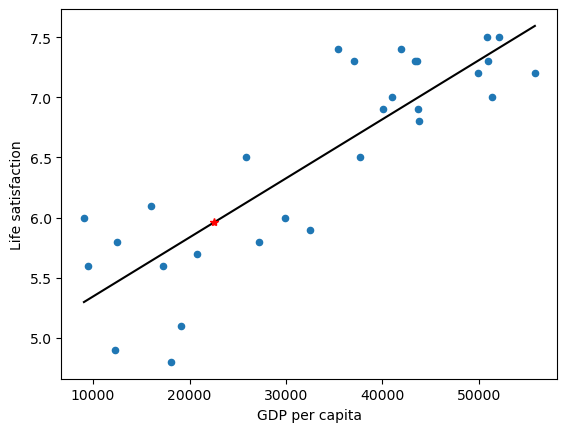

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(3,2)) 

lifesat = pd.read_csv('lifesat_gdp.csv')
#lifesat.describe()
x = lifesat['GDP per capita'].to_numpy().reshape(-1,1)
y = lifesat['Life satisfaction'].to_numpy().reshape(-1,1)
#plt.plot(x,y,'.')
#plt.scatter(x,y)
#lifesat.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')

model = LinearRegression()
model.fit(x,y)

x_new = [[22587]] #Cyprus' GDP per capita
print(model.predict(x_new))

lifesat.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.plot(x,model.predict(x),color='k')
plt.plot(x_new,model.predict(x_new),'*r') #plot cyprus

In [14]:
x.to_numpy()

array([ 9054.914,  9437.372, 12239.894, 12495.334, 15991.736, 17288.083,
       18064.288, 19121.592, 20732.482, 25864.721, 27195.197, 29866.581,
       32485.545, 35343.336, 37044.891, 37675.006, 40106.632, 40996.511,
       41973.988, 43331.961, 43603.115, 43724.031, 43770.688, 49866.266,
       50854.583, 50961.865, 51350.744, 52114.165, 55805.204])

<Axes: >

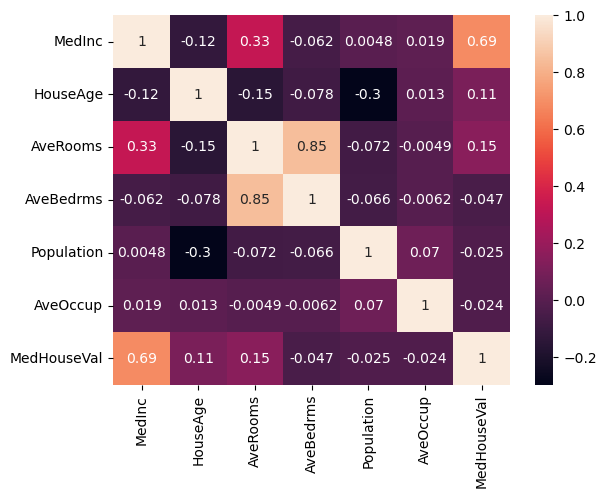

In [38]:
from sklearn.datasets import fetch_california_housing
import seaborn as sns

housing = fetch_california_housing(as_frame=True).frame
#housing.feature_names
#housing
housing = housing.drop(columns=['Longitude','Latitude'])
#sns.pairplot(data=housing.iloc[:100]) #ดูว่า feature ไหนที่สัมพันธ์กับ MedHouseVal
sns.heatmap(data=housing.corr(),annot=True) #ค่าสหสัมพันธ์ (correlation)

In [43]:
# สรุป เราจะใช้ MedInc กับ AveRooms มาเป็นฟีเจอร์ทำนาย MedHouseVal
#housing.plot(kind='scatter',x='MedInc',y='MedHouseVal')
#housing.plot(kind='scatter',x='AveRooms',y='MedHouseVal')
import numpy as np

# matrix X เก็บข้อมูลฟีเจอร์ของบ้าน ขนาด 20640 x 3
X = np.c_[np.ones((20640,1)), housing['MedInc'], housing['AveRooms']]
y = np.c_[housing['MedHouseVal']]

X_train = X[:15612]
y_train = y[:15612]
X_test = X[15612:]
y_test = y[15612:]

# การบ้าน: จงนำ X_train, y_train ไปฝึก Linear Regression ด้วยวิธี Normal Equation
# เพื่อหา theta_mse เมื่อได้ theta_mse 
# แล้ว ให้นำ model ไปใช้ทำนาย MedHouseVal ของ X_test เก็บไว้ y_pred
# แล้วหาว่า MSE ระหว่าง y_test กับ y_pred เป็นเท่าไหร่
# และให้ plot กราฟของโมเดลแทนความสัมพันธ์ระหว่าง MedInc กับ MedHouseVal
# (ทั้งหมดให้ทำตาม slide หน้า 37)

array([[1.        , 8.3252    , 6.98412698],
       [1.        , 8.3014    , 6.23813708],
       [1.        , 7.2574    , 8.28813559],
       ...,
       [1.        , 1.7       , 5.20554273],
       [1.        , 1.8672    , 5.32951289],
       [1.        , 2.3886    , 5.25471698]])

In [32]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [30]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived